In [10]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
#add the latitudes and longitudes to a list
coordinates= list(lat_lngs)


In [4]:
#use the print() function to display the lat and long combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


-19.146040071406347 95.29038114928699
10.368975425596744 -38.42526332999557
37.48647042500656 28.16945287684547
-45.71879933834868 139.40192414734423
51.91658777379973 24.084042131561745
-76.06930392227532 113.41235727234539
-11.811670856516812 -131.2239731619579
12.037468845526163 95.8981869800761
-32.119057978593716 -40.61213437378518
-20.95573255139921 8.543493164191204
-46.85891251699775 103.04978304083136
34.3699883348426 126.72841871773119
-45.16528604534295 44.56902647538598
6.200611750895845 15.5202425109253
-3.1738979413632507 12.055883716157837
76.14184963444842 -156.11016380429837
-45.296125008674736 -29.912071789709586
-27.364818139795318 -86.76451284167906
-38.44329329724514 -107.76580020948268
-8.006173954992121 156.0508275618359
-21.953892741188653 -86.26349999599566
-63.25521592776178 -51.26101232405142
-53.24959738727533 139.38252066497745
-51.95493136324102 -49.22672386547916
-29.66134847000734 -63.101085297026714
-64.60219985077907 97.8677939514966
26.544233332549098

In [7]:
from citipy import citipy

In [8]:
#create a list for holding the cities
cities = []
#identify the nearest ciy for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    #if the city is unique, then we will add it ot the cities list
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count
len(cities)

NameError: name 'coordinates' is not defined

In [7]:
#import the requests library
import requests

#import the API key
from config import weather_api_key
print(weather_api_key)

2c0f7ed569735754671587f6f78337c0


In [11]:
#starting URL for Weather Map API Call
url= "https://api.openweathermap.org/data/2.5/weather?&appid=" + weather_api_key + "&units=imperial"
print(url)

https://api.openweathermap.org/data/2.5/weather?&appid=2c0f7ed569735754671587f6f78337c0&units=imperial


In [13]:
#import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [15]:
#create an empty list to hold the weather data.
city_data= []
#print the befinning of the logging
print('Beginning Data Retrieval    ')
print('----------------------------')

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count= 1
        time.sleep(60)
        
    #create endpoint URL with each city.
    city_url= url + "&q=" + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #addd 1 to the record count
    record_count +=1
      
#run an API request for each of the cities
    try:
          #parse the JSON and retrieve data.
          city_weather= requests.get(city_url).json()
          
          #parse out the needed data
          city_lat = city_weather['coord']['lat']
          city_lng = city_weather['coord']['lon']
          city_max_temp = city_weather['main']['temp_max']
          city_humidity = city_weather['main']['humidity']
          city_clouds = city_weather['clouds']['all']
          city_wind = city_weather['wind']['speed']
          city_country = city_weather['sys']['country'] 
          
          #convert the date to ISO standard
          city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
          
          #append the city information into city_data list
          city_data.append({"City": city.title(),
                           "lat": city_lat,
                           'lng': city_lng,
                           'Max Temp':city_max_temp,
                           'Humidity': city_humidity,
                           'Cloudiness': city_clouds,
                           'Wind Speed': city_wind,
                           'Country': city_country,
                           'Date': city_date})
          
    #if an error is experienced, skip the city 
    except KeyError:
        
          print("City not found. Skipping...")
          pass
          
#indicate that data loading is complete
print("--------------------------")
print("Data Retrieval Complete   ")   
print("--------------------------")
 

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | labuhan
Processing Record 2 of Set 1 | itarema
Processing Record 3 of Set 1 | cine
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | malaryta
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | mergui
City not found. Skipping...
Processing Record 9 of Set 1 | imbituba
Processing Record 10 of Set 1 | henties bay
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | fukue
Processing Record 13 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 14 of Set 1 | bouar
Processing Record 15 of Set 1 | mossendjo
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | laguna
Processing Record 18 of Set 1 | coquimbo
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | gizo
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | ushuaia
Processing Record 2

Processing Record 40 of Set 4 | victoria point
Processing Record 41 of Set 4 | conroe
Processing Record 42 of Set 4 | gimli
Processing Record 43 of Set 4 | ostrovnoy
Processing Record 44 of Set 4 | tucuma
Processing Record 45 of Set 4 | baruun-urt
Processing Record 46 of Set 4 | roma
Processing Record 47 of Set 4 | tasiilaq
Processing Record 48 of Set 4 | cam ranh
Processing Record 49 of Set 4 | vakhrushev
Processing Record 50 of Set 4 | khorixas
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | hambantota
Processing Record 3 of Set 5 | ancud
Processing Record 4 of Set 5 | saleaula
City not found. Skipping...
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | tura
Processing Record 7 of Set 5 | salalah
Processing Record 8 of Set 5 | zoutleeuw
Processing Record 9 of Set 5 | bambous virieux
Processing Record 10 of Set 5 | yenagoa
Processing Record 11 of Set 5 | viedma
Processing Record 12 of Set 5 | goundam
Processing Record 13 of Set 5 | nalut

Processing Record 31 of Set 8 | nanortalik
Processing Record 32 of Set 8 | la grande
Processing Record 33 of Set 8 | choix
Processing Record 34 of Set 8 | teneguiban
City not found. Skipping...
Processing Record 35 of Set 8 | plainview
Processing Record 36 of Set 8 | erdenet
Processing Record 37 of Set 8 | oranjemund
Processing Record 38 of Set 8 | santa maria
Processing Record 39 of Set 8 | karasjok
Processing Record 40 of Set 8 | tarudant
City not found. Skipping...
Processing Record 41 of Set 8 | salihorsk
Processing Record 42 of Set 8 | westport
Processing Record 43 of Set 8 | muttupet
Processing Record 44 of Set 8 | batyrevo
Processing Record 45 of Set 8 | balkanabat
Processing Record 46 of Set 8 | makakilo city
Processing Record 47 of Set 8 | la ronge
Processing Record 48 of Set 8 | andra
Processing Record 49 of Set 8 | el faiyum
City not found. Skipping...
Processing Record 50 of Set 8 | dolores
Processing Record 1 of Set 9 | samalaeulu
City not found. Skipping...
Processing Rec

Processing Record 18 of Set 12 | qostanay
Processing Record 19 of Set 12 | northfield
Processing Record 20 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 21 of Set 12 | kirakira
Processing Record 22 of Set 12 | benguela
Processing Record 23 of Set 12 | ushtobe
Processing Record 24 of Set 12 | monterey
Processing Record 25 of Set 12 | ternate
Processing Record 26 of Set 12 | krasnoselkup
Processing Record 27 of Set 12 | miles city
Processing Record 28 of Set 12 | oranjestad
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | saint-leu
Processing Record 31 of Set 12 | andi
Processing Record 32 of Set 12 | taseyevo
Processing Record 33 of Set 12 | mindelo
Processing Record 34 of Set 12 | ocampo
Processing Record 35 of Set 12 | madang
Processing Record 36 of Set 12 | lola
Processing Record 37 of Set 12 | nguiu
City not found. Skipping...
Processing Record 38 of Set 12 | havre-saint-pierre
Processing Record 39 of Set 12 | lazaro cardenas
Proce

In [16]:
  print(len(city_data))

580


In [17]:
#convert the array of dictionaries to a pandas dataframe
city_data_df =pd.DataFrame(city_data)
city_data_df.head(10)

,City,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Labuhan,-6.8844,112.2051,80.47,77,100,2.91,ID,2022-12-07 17:09:10
1,Itarema,-2.9248,-39.9167,88.05,57,39,18.54,BR,2022-12-07 17:07:09
2,Cine,37.6117,28.0614,49.41,80,99,1.30,TR,2022-12-07 17:09:11
3,Portland,45.5234,-122.6762,40.95,90,100,4.61,US,2022-12-07 17:02:55
4,Malaryta,51.7905,24.0740,33.30,98,100,11.54,BY,2022-12-07 17:09:12
5,Albany,42.6001,-73.9662,57.38,90,100,1.01,US,2022-12-07 17:00:38
6,Atuona,-9.8000,-139.0333,77.32,77,35,19.80,PF,2022-12-07 17:09:12
7,Imbituba,-28.2400,-48.6703,76.50,69,4,11.79,BR,2022-12-07 17:09:13
8,Henties Bay,-22.1160,14.2845,61.38,79,1,12.21,NA,2022-12-07 17:09:13
9,Busselton,-33.6500,115.3333,63.19,67,95,14.74,AU,2022-12-07 17:09:14


In [18]:
new_column_order = ['City', 'Country', 'Date', 'lat', 'lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,lat,lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Labuhan,ID,2022-12-07 17:09:10,-6.8844,112.2051,80.47,77,100,2.91
1,Itarema,BR,2022-12-07 17:07:09,-2.9248,-39.9167,88.05,57,39,18.54
2,Cine,TR,2022-12-07 17:09:11,37.6117,28.0614,49.41,80,99,1.30
3,Portland,US,2022-12-07 17:02:55,45.5234,-122.6762,40.95,90,100,4.61
4,Malaryta,BY,2022-12-07 17:09:12,51.7905,24.0740,33.30,98,100,11.54
5,Albany,US,2022-12-07 17:00:38,42.6001,-73.9662,57.38,90,100,1.01
6,Atuona,PF,2022-12-07 17:09:12,-9.8000,-139.0333,77.32,77,35,19.80
7,Imbituba,BR,2022-12-07 17:09:13,-28.2400,-48.6703,76.50,69,4,11.79
8,Henties Bay,NA,2022-12-07 17:09:13,-22.1160,14.2845,61.38,79,1,12.21
9,Busselton,AU,2022-12-07 17:09:14,-33.6500,115.3333,63.19,67,95,14.74


In [6]:
#create the output file (csv)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

NameError: name 'city_data_df' is not defined

In [37]:
#extract relevant fields from the dataframe for plotting 
lats = city_data_df['lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


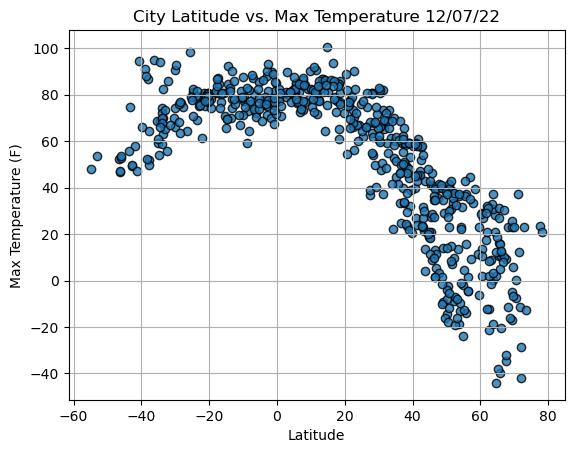

In [44]:
#CREATE SCATTER PLOT
#import time module
import time 

#build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
 
#incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/fig1.png')

#show plot
plt.show()


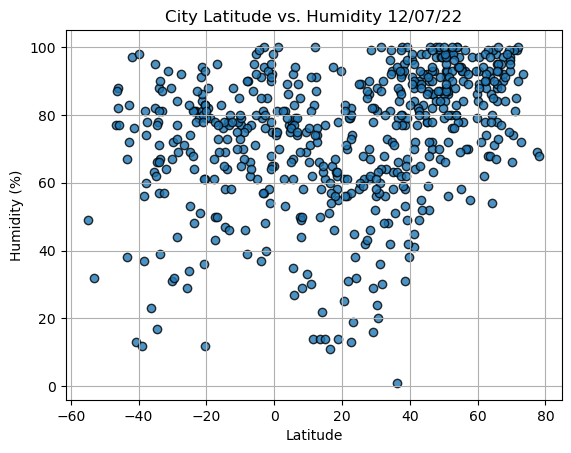

In [47]:
#build the scatter plot for latitude vs. Humidity 
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
 
#incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/fig2.png')

#show plot
plt.show()

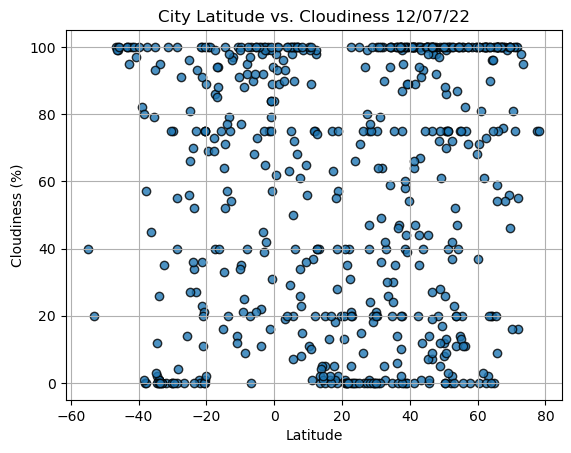

In [49]:
#build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/fig3.png')

#show plot
plt.show()

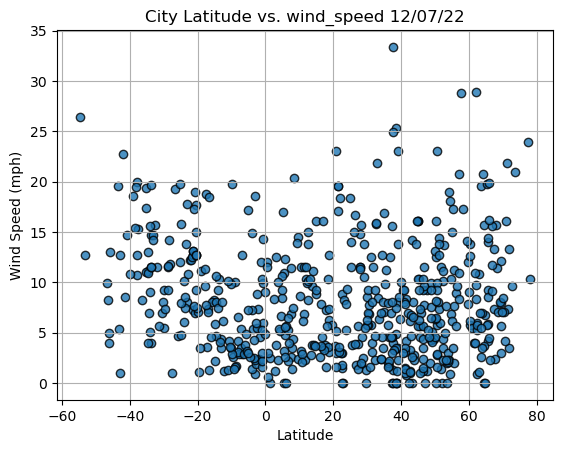

In [52]:
#build the scatter plot for latitude vs. Wind speed
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
 
#incorporate the other graph properties
plt.title(f'City Latitude vs. wind_speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('weather_data/fig4.png')

#show plot
plt.show()

In [4]:
#Import linregress
from scipy.stats import linregress

#create a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regresson(x_values, y_values, title, y_label, text_coordinates):
    
    #run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #create a scatterplot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r")
    
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.annotate(r_value, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show

In [5]:
#Creat Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['lat']>= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['lat']<= 0)]


NameError: name 'city_data_df' is not defined

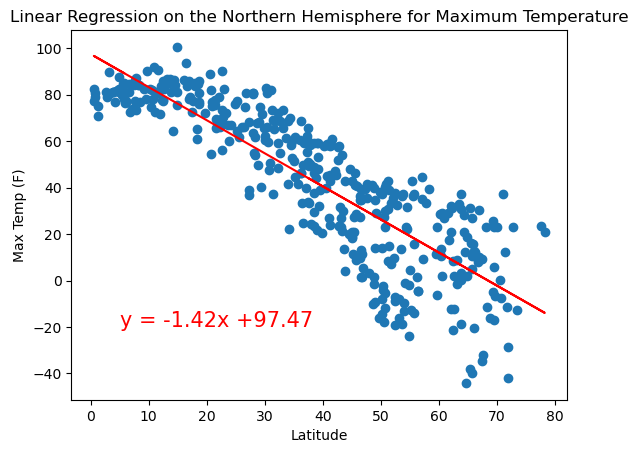

In [124]:
#linear regression on the northern hemisphere
x_values= northern_hemi_df['lat']
y_values= northern_hemi_df['Max Temp']

#Call the function
plot_linear_regresson(x_values,y_values,
                      "Linear Regression on the Northern Hemisphere for Maximum Temperature", 'Max Temp (F)', (5,-20))


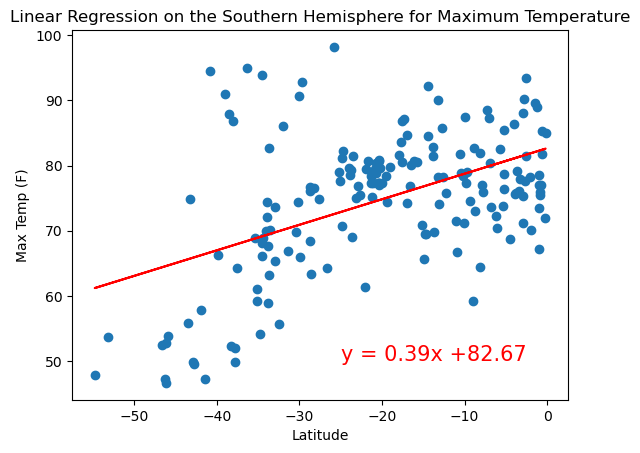

In [125]:
#linear regression on the southern hemisphere
x_values= southern_hemi_df['lat']
y_values= southern_hemi_df['Max Temp']

#Call the function
plot_linear_regresson(x_values,y_values,
                      "Linear Regression on the Southern Hemisphere for Maximum Temperature", 'Max Temp (F)', (-25,50))

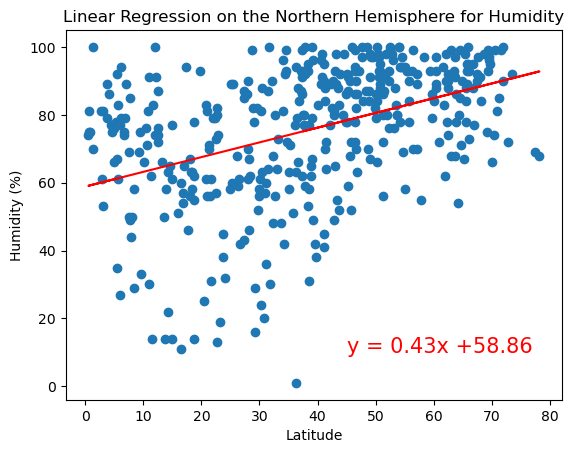

In [127]:
#linear regression on the northern hemisphere for humidity
x_values= northern_hemi_df['lat']
y_values= northern_hemi_df['Humidity']

#Call the function
plot_linear_regresson(x_values,y_values,
                      "Linear Regression on the Northern Hemisphere for Humidity", 'Humidity (%)', (45,10))

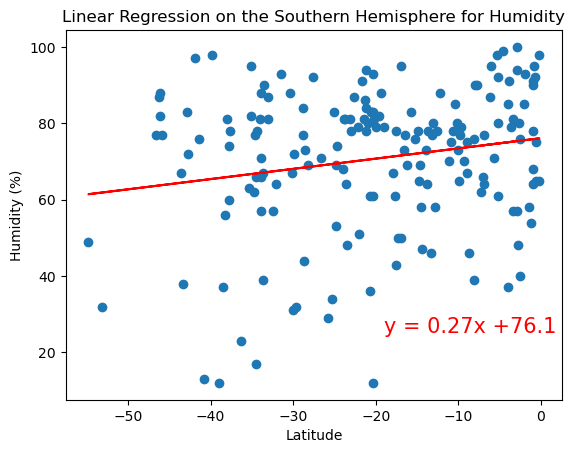

In [128]:
#linear regression on the southern hemisphere for humidity
x_values= southern_hemi_df['lat']
y_values= southern_hemi_df['Humidity']

#Call the function
plot_linear_regresson(x_values,y_values,
                      "Linear Regression on the Southern Hemisphere for Humidity", 'Humidity (%)', (-19,25))

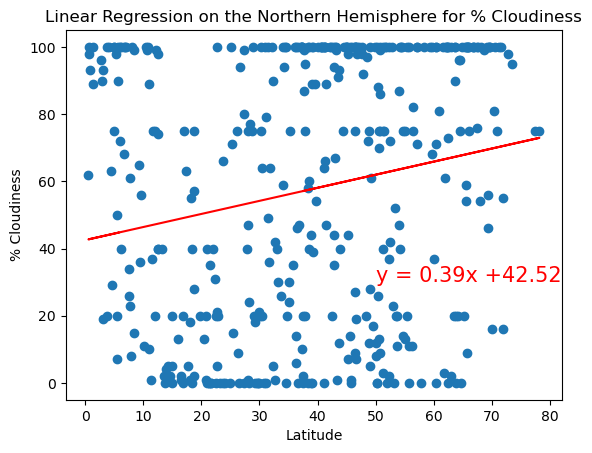

In [129]:
#linear regression on the northern hemisphere for %cloudiness
x_values= northern_hemi_df['lat']
y_values= northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regresson(x_values,y_values,
                      "Linear Regression on the Northern Hemisphere for % Cloudiness", '% Cloudiness', (50,30))

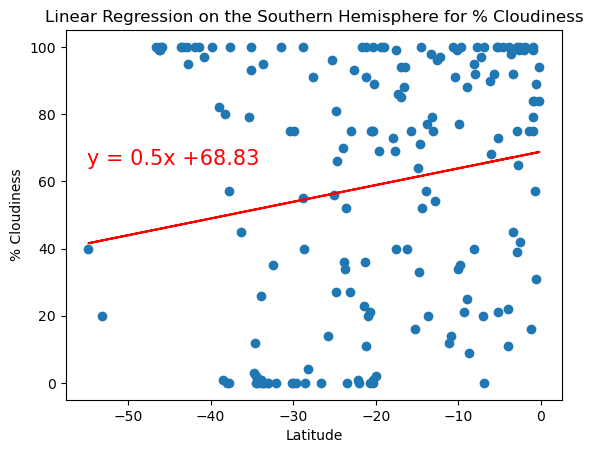

In [131]:
#linear regression on the southern hemisphere for %cloudiness
x_values= southern_hemi_df['lat']
y_values= southern_hemi_df['Cloudiness']

#Call the function
plot_linear_regresson(x_values,y_values,
                      "Linear Regression on the Southern Hemisphere for % Cloudiness", '% Cloudiness', (-55,65))

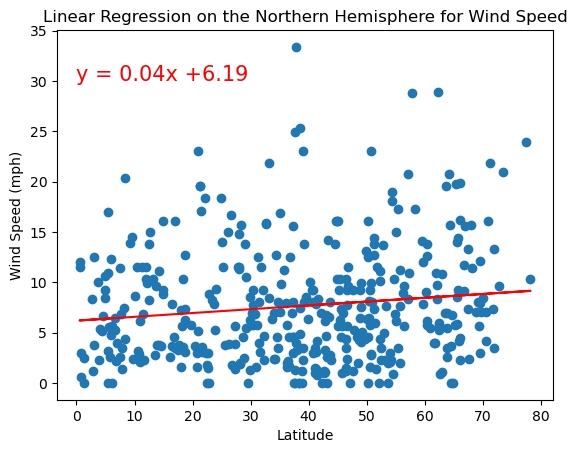

In [136]:
#linear regression on the northern hemisphere for wind speed
x_values= northern_hemi_df['lat']
y_values= northern_hemi_df['Wind Speed']

#Call the function
plot_linear_regresson(x_values,y_values,
                      "Linear Regression on the Northern Hemisphere for Wind Speed", 'Wind Speed (mph)', (0,30))

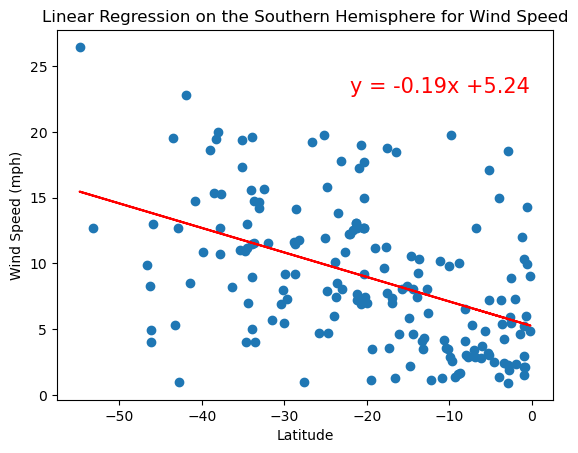

In [140]:
#linear regression on the southern hemisphere for wind speed
x_values= southern_hemi_df['lat']
y_values= southern_hemi_df['Wind Speed']

#Call the function
plot_linear_regresson(x_values,y_values,
                      "Linear Regression on the Southern Hemisphere for Wind Speed", 'Wind Speed (mph)', (-22,23))